In [1]:
import pandas as pd
import plotly as ply
import numpy as np
import matplotlib.pyplot as plt
from user_defined_function.functions import *

image_directory= 'image_folder/'
data_directory = 'C:/Users/ydy1412/Desktop/Python Analysis/팀 프로젝트/data/survey_results_public.csv'

In [2]:
ischanged()

changed2


### load original data

In [3]:
df = pd.read_csv(data_directory)
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df[Rank2_feature[0]].unique()

array(['Very important', nan, 'Somewhat important', 'Important',
       'Not very important', 'Not at all important'], dtype=object)

In [9]:
### Input column 과 output column에 대해 분석
Rank_feature = ['ProblemSolving','BuildingThings','LearningNewTech','BoringDetails',
                'JobSecurity','DiversityImportant','AnnoyingUI','FriendsDevelopers','RightWrongWay',
                'UnderstandComputers','SeriousWork','InvestTimeTools','WorkPayCare','ChallengeMyself','CompetePeers','ChangeWorld',
               ]
# array(['Strongly agree', nan, 'Agree', 'Somewhat agree', 'Disagree',
#        'Strongly disagree'], dtype=object)
Rank2_feature = ['AssessJobRole','AssessJobRemote','AssessJobProduct','AssessJobProfDevel',
                 'ImportantHiringEducation','ImportantHiringCommunication']
# array(['Very important', nan, 'Somewhat important', 'Important',
#        'Not very important', 'Not at all important'], dtype=object)
Nomial_feature = ['FormalEducation','MajorUndergrad','EducationTypes','ImportantBenefits']
total_input_features = Rank_feature+Rank2_feature+Nomial_feature
Output_feature =  ['Developer type']
Information_feature = ['CousinEducation']
### 인코딩이 필요한 칼럼 
Hot_encoding_needed = ['EducationTypes','CousinEducation','ImportantBenefits']

In [17]:
total_input_features = Rank_feature+Rank2_feature+Nomial_feature
total_input_features

['ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'AssessJobRole',
 'AssessJobRemote',
 'AssessJobProduct',
 'AssessJobProfDevel',
 'ImportantHiringEducation',
 'ImportantHiringCommunication',
 'FormalEducation',
 'MajorUndergrad',
 'EducationTypes',
 'ImportantBenefits']

In [6]:
EducationTypes_df = Hot_encoding(df,'EducationTypes',dropna = False)
EducationTypes_df.to_csv('Dataframe_folder/EducationTypes_df_HE.csv')
ImportantBenefits_df = Hot_encoding(df,'ImportantBenefits',dropna = False)
ImportantBenefits_df.to_csv('Dataframe_folder/ImportantBenefits_df_HE.csv')
CousinEducation_df = Hot_encoding(df,'CousinEducation',dropna = False)
CousinEducation_df.to_csv('Dataframe_folder/CousinEducation_df_HE.csv')


In [14]:
Output_data = pd.read_csv('Dataframe_folder/DeveloperType_HE.csv',index_col = 0)

'ProblemSolving'

In [99]:
Output_data = Output_data[Output_data.sum(axis = 1)==1]

In [100]:
Output_data.shape

(16747, 14)

In [101]:
Dummy_df = dict()
for feature in total_input_features:
    Dummy_df[feature] = pd.get_dummies(df[feature])
Dummy_df['EducationTypes'] = EducationTypes_df
Dummy_df['ImportantBenefits'] = ImportantBenefits_df

In [102]:
for key in Dummy_df.keys():
    Dummy_df[key] = Dummy_df[key].loc[Output_data.index]

In [103]:
Dummy_df

{'ProblemSolving':        Agree  Disagree  Somewhat agree  Strongly agree  Strongly disagree
 2          0         0               0               1                  0
 7          0         0               0               0                  0
 11         0         0               0               0                  0
 13         0         0               0               0                  0
 14         0         0               0               1                  0
 ...      ...       ...             ...             ...                ...
 51374      1         0               0               0                  0
 51377      0         0               0               0                  0
 51380      0         0               0               0                  0
 51382      0         0               0               1                  0
 51384      0         0               0               1                  0
 
 [16747 rows x 5 columns],
 'BuildingThings':        Agree  Disagree  Somewhat a

In [104]:
dummy_df_list = []
for key in Dummy_df.keys():
    dummy_df_list.append(Dummy_df[key])
Input_data = np.concatenate(dummy_df_list,axis = 1)

In [105]:
Input_data.shape

(16747, 161)

In [106]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(Input_data, Output_data, test_size=0.2, random_state=42)

In [107]:
from keras.models import Sequential
from keras.layers import Dense

def getModel(arr):
    model=Sequential()
    for i in range(len(arr)):
        if i!=0 and i!=len(arr)-1:
            if i==1:
                model.add(Dense(arr[i],input_dim=arr[0],kernel_initializer='normal', activation='relu'))
            else:
                model.add(Dense(arr[i],activation='relu'))
    model.add(Dense(arr[-1],kernel_initializer='normal',activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])
    return model
firstModel=getModel([161,50,14])

In [108]:
import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

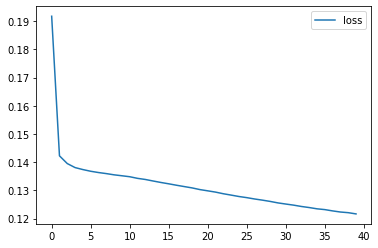

In [109]:
firstModel.fit(np.array(trainX),np.array(trainY),epochs=40,callbacks=[plot_losses])

In [110]:
y_pred = firstModel.predict(testX)

In [111]:
y_pred.shape

(3350, 14)

In [112]:
List = []
for i in range(y_pred.shape[0]) :
    if testY[i].sum() == 1.0 : 
        List.append(i)

KeyError: 0

In [87]:
y_pred = y_pred[List,:]

In [88]:
testY = testY[List,:]

In [92]:
Y_pred = np.argmax(y_pred,axis = 1)

In [93]:
TestY =  np.argmax(testY,axis = 1)

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(TestY, Y_pred)

0.6312292358803987

In [71]:
count = 0
for i in a :
    if a[i] == b[i] :
        count += 1
count

115

In [70]:
accuracy

1.591695501730104

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier

In [ ]:
class create_classification_df(x,y,models = ['SVM','NB','XGboost','KNeighbors','Logistic','SGD']
                             , performance = ['f1-score','recall','Accuracy','precise'], binomial = False) :
    
    def __init__(self, x,y,models = ['SVM','NB','XGboost','KNeighbors','Logistic','SGD']
                             , performance = ['f1-score','recall','Accuracy','precise'], binomial = False)):
        self.x = x
        self.y = y
        self.models = models
        self.performance = performance 
        self.binomial = binomial
        self.Set_xgboost_parameter()
    def Set_xgboost_parameter(self,objective = 'multi:softprob',eta = 0.1,max_depth = 5, num_class = 3, subsample = 0.8,
                             colsample_bytree = 0.8, eval_metric = 'mlogloss',min_child_weight= 10,reg_alpha = 1.5,
                             reg_lambda = 5, scale_pos_weight = 1, n_thread = -1) :
        if 'XGboost' in self.models :
            self.params = {'objective': objective,
                      'learning_rate':eta,
                      'max_depth': max_depth,
                      'num_class': num_class,
                      'subsample': subsample,
                      'colsample_bytree': colsample_bytree,
                      'eval_metric': eval_metric,
                      'min_child_weight': min_child_weight,
                      'reg_alpha': reg_alpha, 
                      'reg_lambda' : reg_lambda,
                      'scale_pos_weight' : scale_pos_weight,          
                      'n_thread':n_thread }
        else:
            print("no xgboost here")
  
    def construct_model(self) :
        model_dict = dict()
        if binomial == True:
            performance.append('AUC-ROC')
        for model in models :
            if model == 'SVM':
                model_dict[model] = SVC(kernel = 'rbf',random_state = 10)
            elif model == 'NB' :
                model_dict[model] = MultinomialNB()
            elif model == 'XGboost' :
                model_dict[model] = xgb.train(self.params,dtrain,n_rounds,early_stopping_rounds=early_stop,verbose_eval=10)

kf =StratifiedKFold(n_splits=5)
for train_index,test_index in kf.split(Input_data): 
    xtr,xvl = Input_data[train_index], Input_data[test_index]
    ytr,yvl = Output_data[train_index], Output_data[test_index]
    
    mNB.fit(xtr,ytr)
    y_mNB = mNB.predict(xvl)
    cv_score.append(log_loss(yvl,mNB.predict_proba(xvl)))    
    pred_test_full += mNB.predict_proba(X_test_cv)